In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
df.shape

(303, 15)

In [8]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

### Drop index column

In [27]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


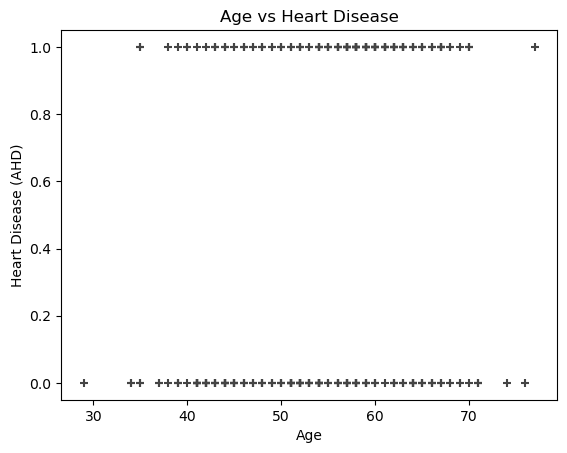

In [40]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['AHD'], marker='+', color='#444')
plt.xlabel('Age')
plt.ylabel('Heart Disease (AHD)')
plt.title('Age vs Heart Disease')
plt.show()


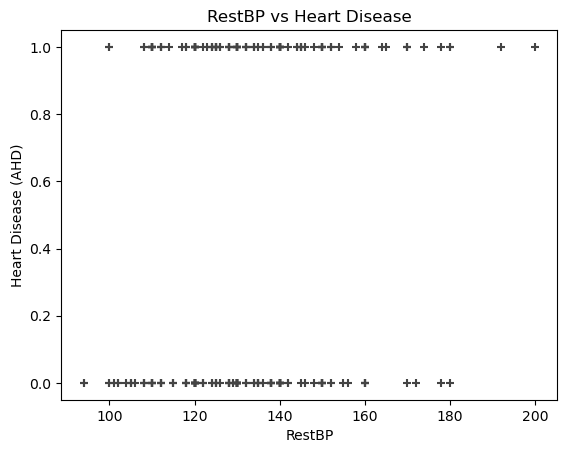

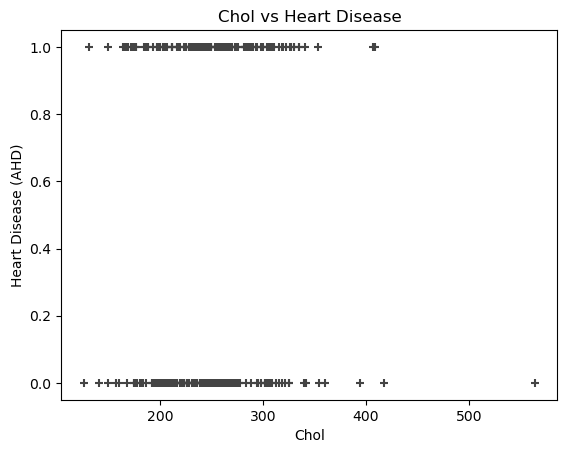

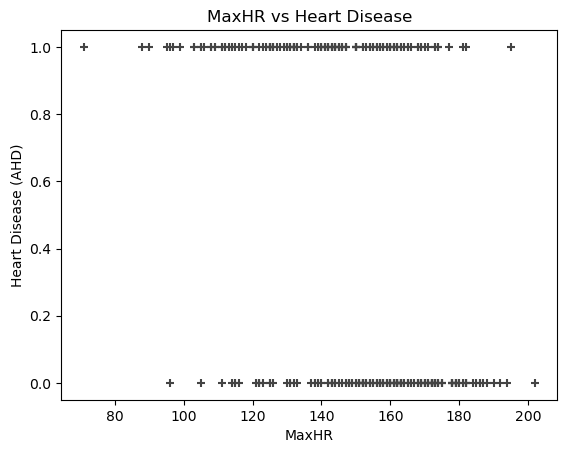

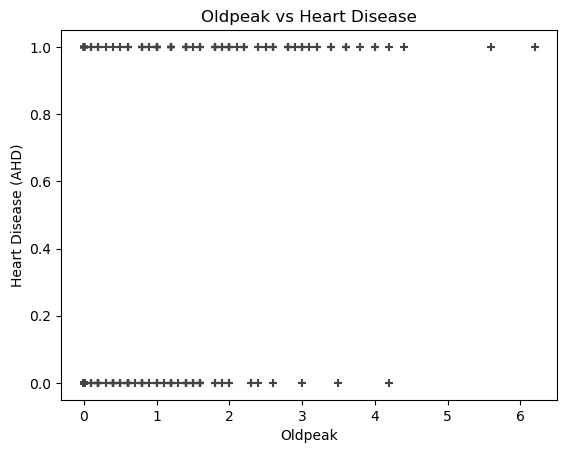

In [41]:
for col in ['RestBP', 'Chol', 'MaxHR', 'Oldpeak']:
    plt.scatter(df[col], df['AHD'], marker='+', color='#444')
    plt.xlabel(col)
    plt.ylabel('Heart Disease (AHD)')
    plt.title(f'{col} vs Heart Disease')
    plt.show()


### AS we can see in the above plot the range is from 0 to 1 so we can you logistic regression for this dataset

### Encode categorical columns


In [29]:
categorical_cols = ['ChestPain', 'Thal', 'AHD']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [30]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


###  Fill missing values with median (for numeric columns)

In [31]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [33]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

### Split data into features and target


In [34]:
X = df.drop('AHD',axis=1)
y = df['AHD']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=18)

### Feature scaling


In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Train logistic regression model without scaling


In [45]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Make predictions


In [46]:
y_pred = model.predict(X_test)

### Evaluate model

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8360655737704918
Confusion Matrix:
 [[25  4]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Train logistic regression model with using scaling

In [49]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Make predictions


In [51]:
y_pred_scaled = model.predict(X_test_scaled)

### Evaluate model


In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

Accuracy: 0.819672131147541
Confusion Matrix:
 [[27  2]
 [ 9 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61

